# PCA

## What is PCA?

**P**rincipal **C**omponent **A**nalysis (PCA) is a dimensionality reduction technique often used to transform high-dimensional data into a set of linearly uncorrelated variables. In short, the method works by iteratively defining principal components with the largest possible variance (i.e. accounts for as much of the variability in your data as possible).  

See [this link](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/140579#140579 "PCA Explanation") for an in-depth explanation of PCA. It starts with a simple explanation (basically ELI5) and then builds onto it by describing how PCA works. Here's an excerpt. 

***
_Imagine a big family dinner, where everybody starts asking you about PCA. First you explain it to your great-grandmother; then to you grandmother; then to your mother; then to your spouse; finally, to your daughter (who is a mathematician). Each time the next person is less of a layman. Here is how the conversation might go._

__Great-grandmother__: I heard you are studying "Pee-See-Ay". I wonder what that is...

__You__: Ah, it's just a method of summarizing some data. Look, we have some wine bottles standing here on the table. We can describe each wine by its colour, by how strong it is, by how old it is, and so on (see this very nice visualization of wine properties taken from here). We can compose a whole list of different characteristics of each wine in our cellar. But many of them will measure related properties and so will be redundant. If so, we should be able to summarize each wine with less characteristics! This is what PCA does.


## When can I apply PCA?

If you've heard Rob Knight give his [microbiome talk](https://www.ted.com/talks/rob_knight_how_our_microbes_make_us_who_we_are) (yes, that one), then you've probably already witnessed PCA in action.  

For example, here's a plot from one of his talks - PCA summarizes high dimensional sequencing data from the human microbiota. 

![](https://i.ytimg.com/vi/Pb272zsixSQ/maxresdefault.jpg "Microbiome PCA" )


***

Another common application of PCA is in human genetics. PCA is commonly used to determine ancestry of individuals from genotype data. This can be useful for researchers performing genetic association studies. If we want to mitigate the effects of population stratification on our GWAS, we can perform PCA and regress out the top components (which should correspond to populations).  

For example, here's a PCA plot showing the first 2 principal components of individuals from the [1000 Genomes Project](http://www.internationalgenome.org/ 'Link to 1000 Genomes Project homepage').
![](http://massgenomics.org/wp-content/uploads/2012/11/worldwide-pca-analysis.jpg "1KGP PCA" )


## Methods to perform PCA
Usually before we perform PCA, we want to normalize our data first using z-score normalization. This basically entails centering each feature with mean 0 and using z-scores to normalize our data points.  

By far the most common method for PCA is **S**ingular **V**alue **D**ecomposition (SVD). Through linear algebra black magic, it can compute orthonormal eigenvectors that we can use to transform our data into principal component space.
![](http://public.lanl.gov/mewall/kluwer2002/SVD_GEA.jpg "SVD" )


## How do I use PCA?
Believe it or not, PCA is actually really easy to perform (We'll perform it in a few lines of code). Some really smart mathmeticians already solved all of the underlying math for us, and programmers have implemented it into Python and R. Because Python is a lot easier to use than R, we'll use that today. 

---
### The Iris dataset
We will use the iris dataset as an example, which describes 3 different types of irises by petal and sepal length and width. It is a commonly used dataset in classification, for different types of machine learning and PCA.

__Requirements:__

| Module | Version |
| --- | --- |
| numpy | 1.13+ |
| sklearn | 0.19.0+ |
| matplotlib | 2.0.2+ |
| seaborn | 0.8.1+ |

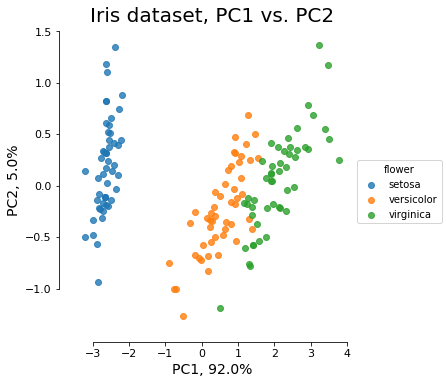

In [39]:
# import python modules
import pandas as pd
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
import seaborn as sns

# import iris data from sklearn.datasets, load into pandas dataframe
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['flower'] = [iris.target_names[i] for i in iris.target]

# performing PCA in 2 simple lines of code
pca = decomposition.PCA(n_components=2)
fit_pca = pca.fit_transform(df.iloc[:,:4])

# check how much variance is explained
variance_explained = pca.explained_variance_ratio_ 

# post-processing results (putting it back into the dataframe)
df['PC1'] = fit_pca[:,0]
df['PC2'] = fit_pca[:,1]

# plotting the results
sns.lmplot(x='PC1', y='PC2', data=df, fit_reg=False, hue='flower')
plt.title('Iris dataset, PC1 vs. PC2', fontsize=20)
plt.xlabel('PC1, {}%'.format(round(variance_explained[0] * 100), 1), fontsize=14)
plt.ylabel('PC2, {}%'.format(round(variance_explained[1] * 100), 1), fontsize=14)
plt.tick_params(labelsize=11)
sns.despine(offset=10, trim=True);
plt.show()

## How do I interpret this?
Based on the plot above, I would interpret this as follows: 
We have 3 types of flowers that forms 2-3 distinct clusters (depending how you look at it). Based on the features provided in this dataset (sepal length, sepal width, petal length, petal width), we can infer that versicolor and virginica are more similar to each other than to setosa.

We see that PC1 captures 92% of the total variance, while PC2 captures 5.0%. This gives us an idea of the relative importance of the two axes - distances on PC1 should be considered more important than distances on PC2.

When we perform PCA on our own data, typically we do not have categories assigned to our data. In this case, we do because it's a pubically available dataset that is commonly used for classification. 

We usually can label data points, see where they cluster, and make our own inferences based on what the data is telling us. For example, if we perform PCA on genetic data (i.e. genotypes from a GWAS to check for population bias), we usually have labels of individual samples. We can then see where our unknown samples cluster relative to samples with known genetic backgrounds. 

The iris dataset is nice because everything works straight out of the box and we get nice, distinct clusters.  
__But what if there are outliers in our data?__

---
### The Wine dataset

The [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine) contain data that are the results of chemical analyses of wines grown in the same region in Italy but from 3 different varieties. The features, or variables of this dataset include:

1) Alcohol  
2) Malic acid   
3) Ash  
4) Alcalinity of ash  
5) Magnesium  
6) Total phenols   
7) Flavanoids  
8) Nonflavanoid phenols   
9) Proanthocyanins   
10) Color intensity   
11) Hue   
12) OD280/OD315 of diluted wines  
13) Proline  

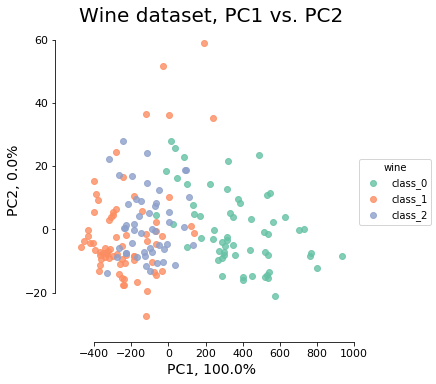

In [45]:
# import python modules
import pandas as pd
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
import seaborn as sns

# load our wine dataset
wine = datasets.load_wine()
df2 = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df2['wine'] = [wine.target_names[i] for i in wine.target]

pca2 = decomposition.PCA(n_components=2)
fit2_pca = pca2.fit_transform(df2.iloc[:,:13])

# check how much variance is explained
variance_explained = pca2.explained_variance_ratio_ 

# post-processing results (putting it back into the dataframe)
df2['PC1'] = fit2_pca[:,0]
df2['PC2'] = fit2_pca[:,1]

# plotting the results
sns.lmplot(x='PC1', y='PC2', data=df2, fit_reg=False, hue='wine', palette="Set2")
plt.title('Wine dataset, PC1 vs. PC2', fontsize=20)
plt.xlabel('PC1, {}%'.format(round(variance_explained[0] * 100), 1), fontsize=14)
plt.ylabel('PC2, {}%'.format(round(variance_explained[1] * 100), 1), fontsize=14)
plt.tick_params(labelsize=11)
sns.despine(offset=10, trim=True);
plt.show()

**The problem:** 
Since PCA works by transforming features based on variance, one feature can drown out the other features if it is highly variable. As you see here, separation of the clusters is harder, and 1 PC explains all of the variance (atypical!).  

To account for this, we can use data normalization. One common way of normalizing data is through z-score normalization. Luckily, it's already coded into sklearn so it's as simple as adding 1 additional line in our code.

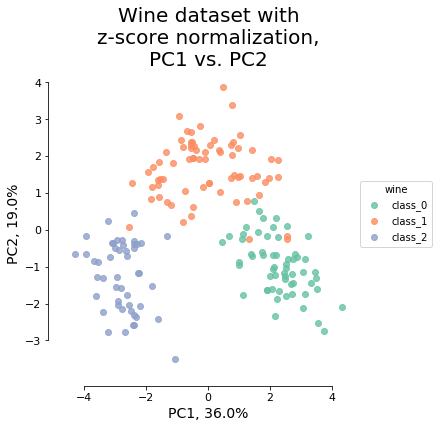

In [50]:
# import python modules
import pandas as pd
from sklearn import datasets, decomposition
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# load our wine dataset
wine = datasets.load_wine()
df2 = pd.DataFrame(data=wine.data, columns=wine.feature_names)

#===Normalize our data before running PCA==="
df2 = pd.DataFrame(data=preprocessing.scale(df2), columns=wine.feature_names)

df2['wine'] = [wine.target_names[i] for i in wine.target]

# perform PCA as before
pca2 = decomposition.PCA(n_components=2)
fit2_pca = pca2.fit_transform(df2.iloc[:,:13])

# check how much variance is explained
variance_explained = pca2.explained_variance_ratio_ 

# post-processing results (putting it back into the dataframe)
df2['PC1'] = fit2_pca[:,0]
df2['PC2'] = fit2_pca[:,1]

# plotting the results
sns.lmplot(x='PC1', y='PC2', data=df2, fit_reg=False, hue='wine', palette="Set2")
plt.title('Wine dataset with\nz-score normalization,\nPC1 vs. PC2', fontsize=20)
plt.xlabel('PC1, {}%'.format(round(variance_explained[0] * 100), 1), fontsize=14)
plt.ylabel('PC2, {}%'.format(round(variance_explained[1] * 100), 1), fontsize=14)
plt.tick_params(labelsize=11)
sns.despine(offset=10, trim=True);
plt.show()

## For more practice:

I would check out the [UC Irvine datasets](https://archive.ics.uci.edu/ml/datasets.html) - there are plenty of datasets that you can use for practicing PCA. The classification datasets are best for this task. For more on machine learning, check out [sklearn](http://scikit-learn.org/stable/index.html). Most of the algorithms for machine learning or analysis of "big data" are already programmed into this module.

In general, there are programs developed for performing PCA on datasets that you're interested in. For example, for performing PCA on genotypes in GWAS, [PLINK](https://www.cog-genomics.org/plink/1.9/strat) is a commonly-used tool. Oftentimes, we use software that others have developed because it makes our lives easier.

In the case of (epi)genomics, sometimes you may want to perform PCA to check for biological or technical bias in your sequencing experiments. We can use PCA to check for these biases, and follow with linear regression and use these principal components as covariates. 

** Credit to: Joshua Chiou (Gaulton Lab)**